In [1]:
# 1. Environment Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Data Loading and Preparation

# 2.1 Load the file
df = pd.read_csv('cardiotocographic.csv')

# 2.2 Display first 5 rows
print("First 5 rows of the data:")
display(df.head())

First 5 rows of the data:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
# 2.3 Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [4]:
# 2.4 Handle missing values
# Option 1: Drop rows with missing values
# df = df.dropna()
# Option 2: Impute missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

In [5]:
# 2.5 Check data types
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [6]:
# 2.6 Convert columns with incorrect types (example)
# Uncomment and modify if needed
# df['YourColumn'] = df['YourColumn'].astype(float)

# 2.7 Detect and treat outliers using IQR
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"Column {col}: {outliers} outliers")
    # Optional: Cap outliers
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

Column LB: 10 outliers
Column AC: 43 outliers
Column FM: 347 outliers
Column UC: 13 outliers
Column DL: 125 outliers
Column DS: 120 outliers
Column DP: 284 outliers
Column ASTV: 10 outliers
Column MSTV: 80 outliers
Column ALTV: 318 outliers
Column MLTV: 81 outliers
Column Width: 10 outliers
Column Tendency: 10 outliers
Column NSP: 559 outliers


In [8]:
# 3. Statistical Summary

# 3.1 Summary statistics
print("\nSummary Statistics:")
summary = df.describe().T
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
display(summary[['mean', 'median', 'std', 'IQR', 'min','max']])


Summary Statistics:


,mean,median,std,IQR,min,max
LB,133.290331,133.000000,9.930268,14.000000,105.000000,161.000000
AC,0.003132,0.001634,0.003828,0.005606,-0.008409,0.014015
FM,0.001568,0.000000,0.002485,0.002567,-0.003850,0.006416
UC,0.004362,0.004484,0.003001,0.004685,-0.005177,0.013564
DL,0.001770,0.000000,0.002668,0.003289,-0.004934,0.008224
DS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,46.981873,49.000000,17.612745,29.000000,-11.500000,104.500000
MSTV,1.304644,1.200000,0.781091,1.000000,-0.800000,3.200000
ALTV,6.691678,0.000000,10.378400,11.000000,-16.500000,27.500000


In [9]:
# 3.2 Print observations (example)
print("\nObservations:")
for col in numeric_cols:
    print(f"{col}: mean = {df[col].mean():.2f}, median = {df[col].median():.2f}, std = {df[col].std():.2f}")


Observations:
LB: mean = 133.29, median = 133.00, std = 9.93
AC: mean = 0.00, median = 0.00, std = 0.00
FM: mean = 0.00, median = 0.00, std = 0.00
UC: mean = 0.00, median = 0.00, std = 0.00
DL: mean = 0.00, median = 0.00, std = 0.00
DS: mean = 0.00, median = 0.00, std = 0.00
DP: mean = 0.00, median = 0.00, std = 0.00
ASTV: mean = 46.98, median = 49.00, std = 17.61
MSTV: mean = 1.30, median = 1.20, std = 0.78
ALTV: mean = 6.69, median = 0.00, std = 10.38
MLTV: mean = 8.01, median = 7.40, std = 5.05
Width: mean = 70.29, median = 67.00, std = 39.57
Tendency: mean = 0.32, median = 0.00, std = 0.62
NSP: mean = 1.00, median = 1.00, std = 0.00


<module 'matplotlib.pyplot' from 'C:\\Users\\Qubits\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

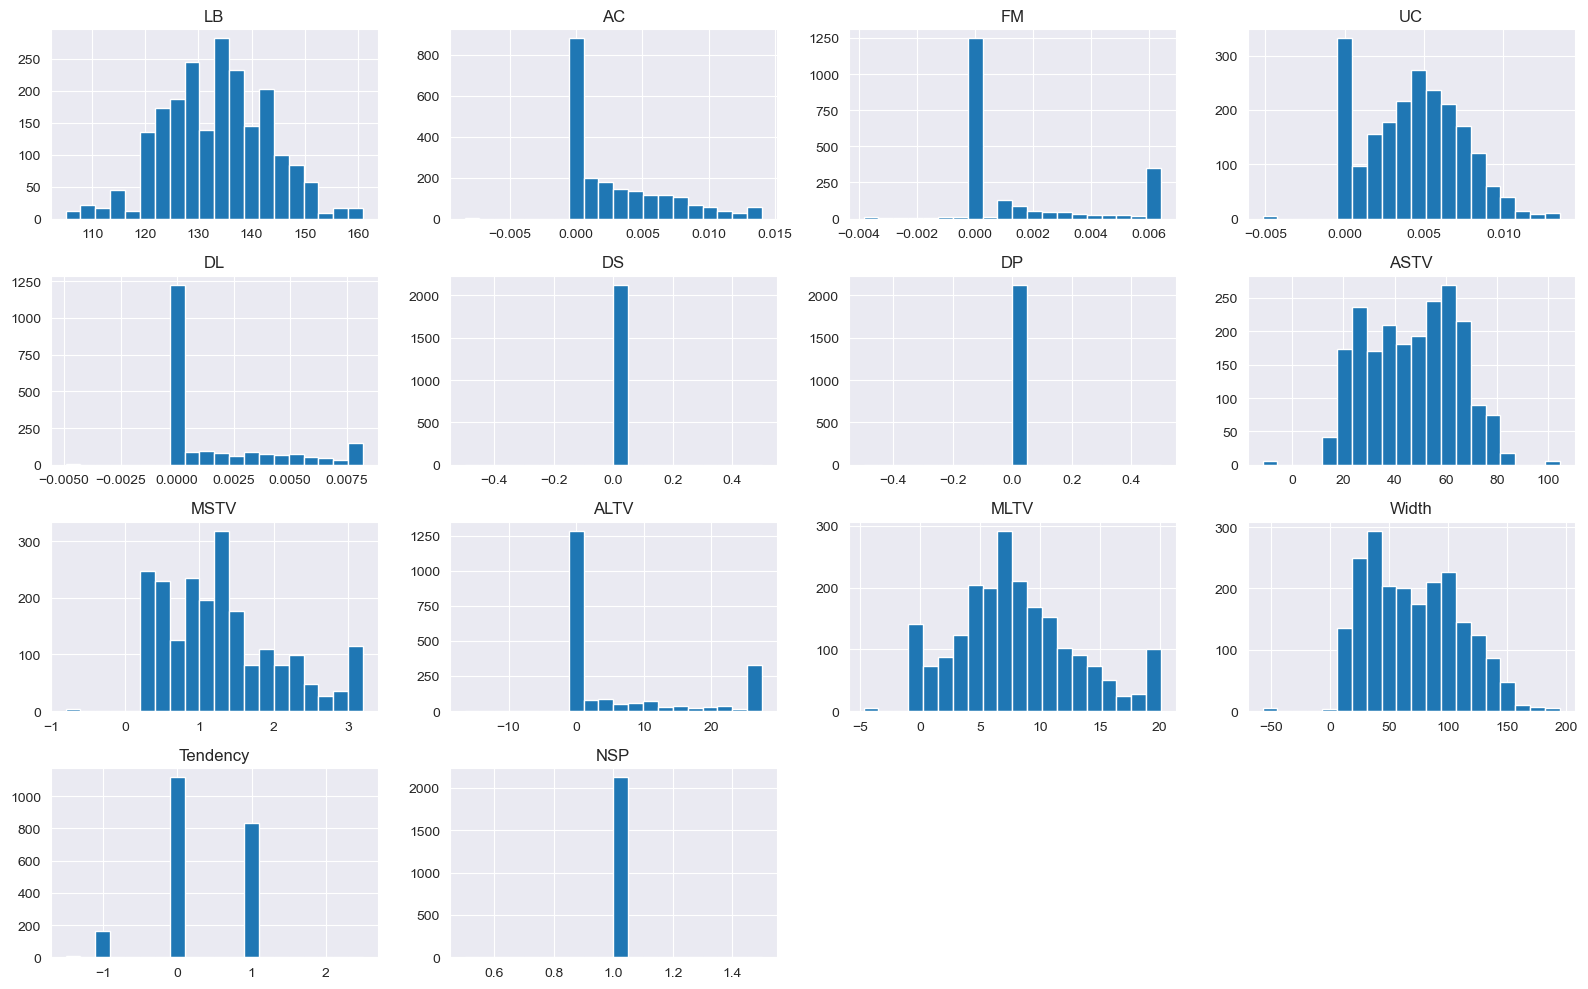

In [10]:
# 4. Data Visualization

# 4.1 Histograms
df[numeric_cols].hist(figsize=(16, 10), bins=20)
plt.tight_layout()
plt


Strong Positive Correlations (>0.7):


""



Strong Negative Correlations (<-0.7):


""


<Figure size 1200x1000 with 0 Axes>

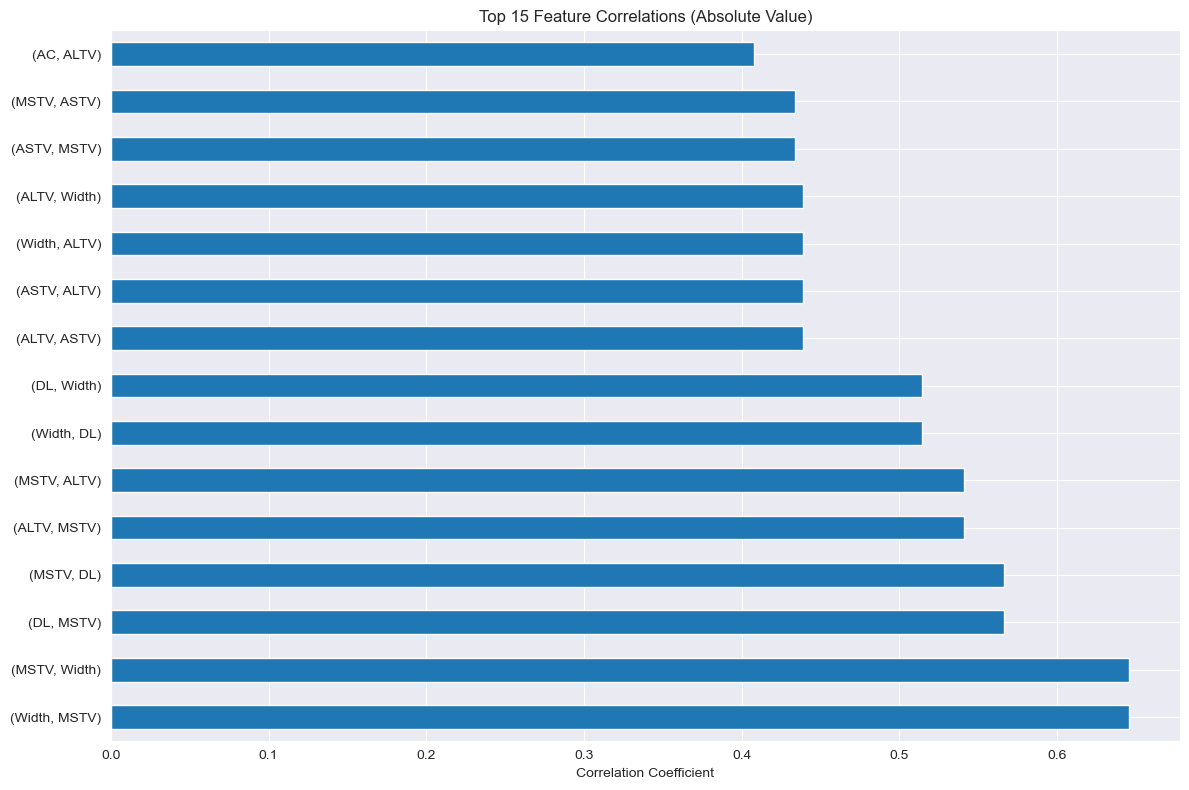

In [23]:
# 4.1 Identify strong positive/negative correlations
print("\nStrong Positive Correlations (>0.7):")
positive_corr = corr[(corr > 0.7) & (corr < 1.0)]
display(positive_corr.dropna(how='all').dropna(axis=1, how='all'))

print("\nStrong Negative Correlations (<-0.7):")
negative_corr = corr[(corr < -0.7)]
display(negative_corr.dropna(how='all').dropna(axis=1, how='all'))

# Visualize top correlations
plt.figure(figsize=(12, 10))
# Get the absolute correlation values and sort them
corr_abs = corr.abs().unstack()
corr_abs = corr_abs.sort_values(ascending=False)
# Remove self-correlations
corr_abs = corr_abs[corr_abs < 1.0]
# Take top 15 correlations
top_corr = corr_abs.head(15)

# Create a bar chart of top correlations
plt.figure(figsize=(12, 8))
top_corr.plot(kind='barh')
plt.title('Top 15 Feature Correlations (Absolute Value)')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

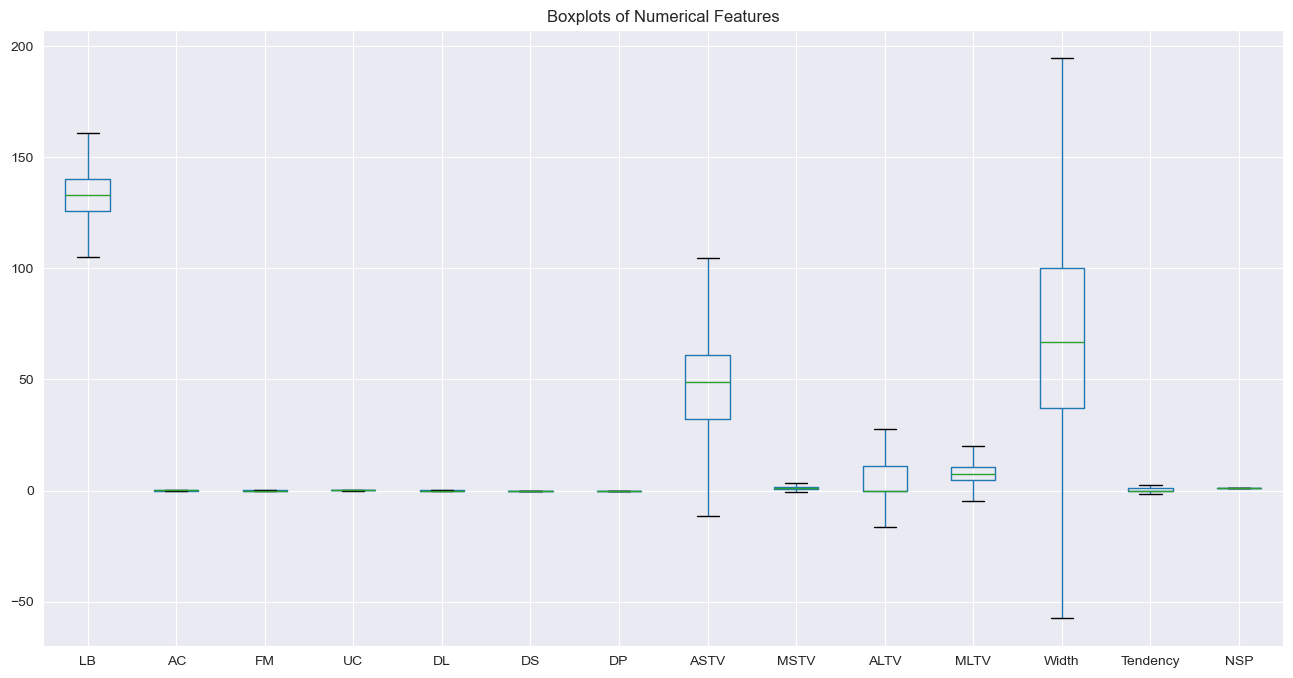

In [11]:
# 4.2 Boxplots
plt.figure(figsize=(16, 8))
df.boxplot(column=list(numeric_cols))
#df.boxplot(column=numeric_cols)
plt.title("Boxplots of Numerical Features")
plt.show()

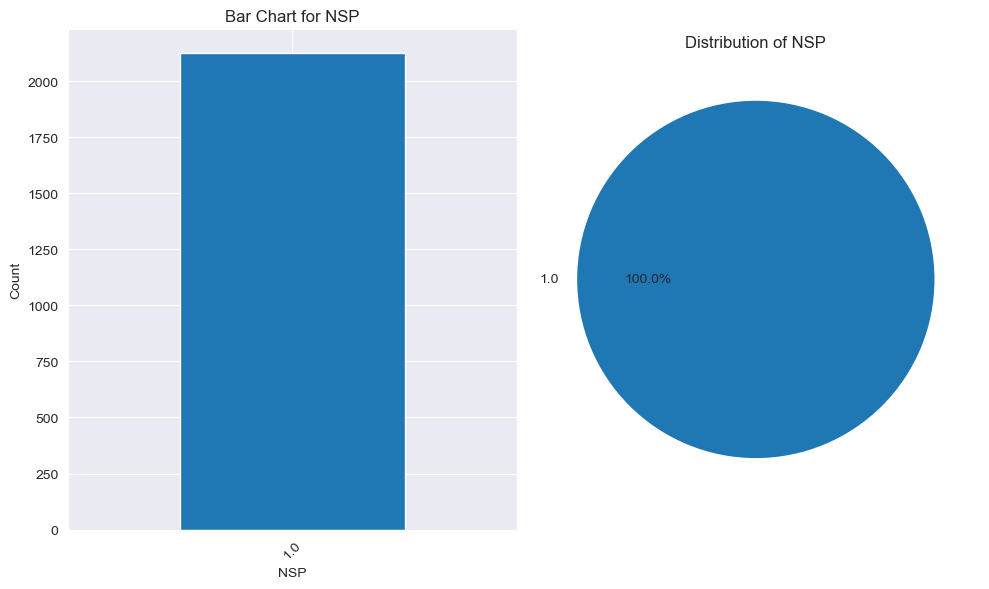


Value counts for NSP:
NSP
1.0    2126
Name: count, dtype: int64


In [22]:
# 4.3 Bar/Pie charts for categorical columns
# For cardiotocographic data, we may need to check for class/diagnostic features
# These could be NSP (fetal state class code) or other clinical classifications

# Check if 'NSP' or similar classification columns exist
class_columns = [col for col in df.columns if col in ['NSP', 'Fetal_Health', 'Class']]

if class_columns:
    for col in class_columns:
        plt.figure(figsize=(10, 6))
        value_counts = df[col].value_counts()

        # Bar chart
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar')
        plt.title(f'Bar Chart for {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        # Pie chart
        plt.subplot(1, 2, 2)
        value_counts.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Distribution of {col}')
        plt.ylabel('')

        plt.tight_layout()
        plt.show()

        print(f"\nValue counts for {col}:")
        print(value_counts)
else:
    print("No categorical class columns found in the dataset.")

    # Alternative: Convert numerical columns to categories for visualization
    # Example: Create bins for a continuous variable
    # Uncomment if needed for your specific analysis
    """
    # Example: Binning a variable like fetal heart rate
    if 'FHR' in df.columns:
        plt.figure(figsize=(10, 6))
        df['FHR_Category'] = pd.cut(df['FHR'], bins=5)
        df['FHR_Category'].value_counts().plot(kind='bar')
        plt.title('FHR Categories')
        plt.show()
    """

In [24]:

# 4.3 If time-related data exists, analyze temporal trends

# Check if any time-related columns exist
time_columns = [col for col in df.columns if any(time_keyword in col.lower()
                                                for time_keyword in ['time', 'date', 'day', 'month', 'year', 'hour', 'minute', 'second'])]

if time_columns:
    print(f"\nTime-related columns found: {time_columns}")

    for time_col in time_columns:
        # Ensure the column is in datetime format
        try:
            df[f'{time_col}_dt'] = pd.to_datetime(df[time_col])
            time_col_dt = f'{time_col}_dt'

            # Sort by the datetime column
            df_sorted = df.sort_values(by=time_col_dt)

            # Plot trends over time for a few key numerical variables
            plt.figure(figsize=(14, 8))
            for i, col in enumerate(numeric_cols[:3]):  # Plot first 3 numeric columns
                plt.subplot(3, 1, i+1)
                plt.plot(df_sorted[time_col_dt], df_sorted[col])
                plt.title(f'{col} over time')
                plt.ylabel(col)
                if i == 2:  # Only show x-label on the bottom plot
                    plt.xlabel(time_col)
                plt.grid(True)
            plt.tight_layout()
            plt.show()

            # Check for seasonality or periodicity if enough data points
            if len(df) > 50:
                plt.figure(figsize=(14, 10))
                for i, col in enumerate(numeric_cols[:3]):
                    plt.subplot(3, 1, i+1)
                    pd.plotting.autocorrelation_plot(df_sorted[col])
                    plt.title(f'Autocorrelation: {col}')
                plt.tight_layout()
                plt.show()
        except:
            print(f"Could not convert {time_col} to datetime format.")
else:
    print("\nNo time-related columns found in the dataset. Temporal analysis skipped.")
    print("If time data exists but was not detected, please specify the column name manually.")




No time-related columns found in the dataset. Temporal analysis skipped.
If time data exists but was not detected, please specify the column name manually.


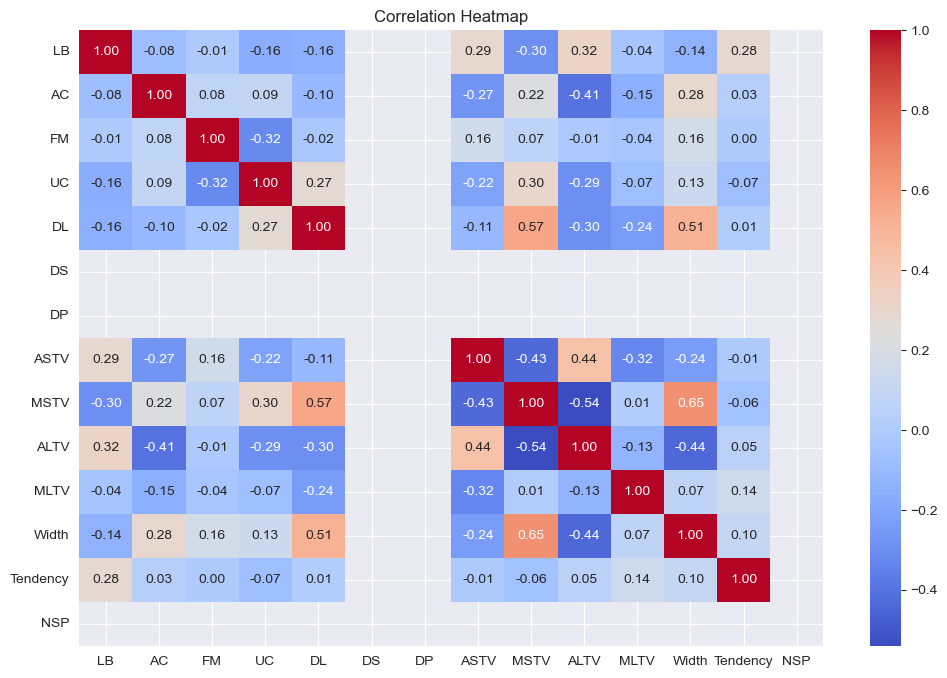

In [13]:
# 4.4 Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

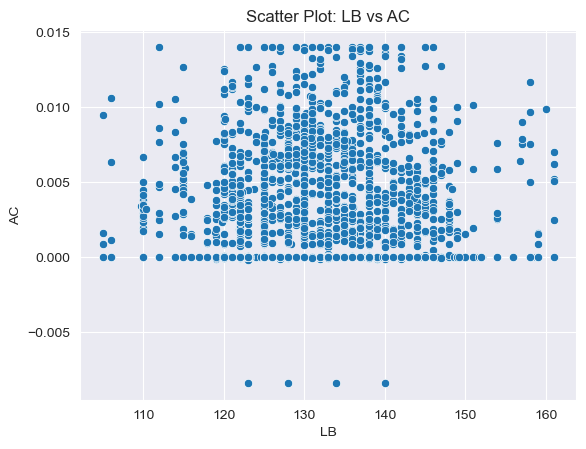

In [14]:
# 4.5 Scatter plots for selected pairs (example: first two columns)
if len(numeric_cols) >= 2:
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title(f"Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}")

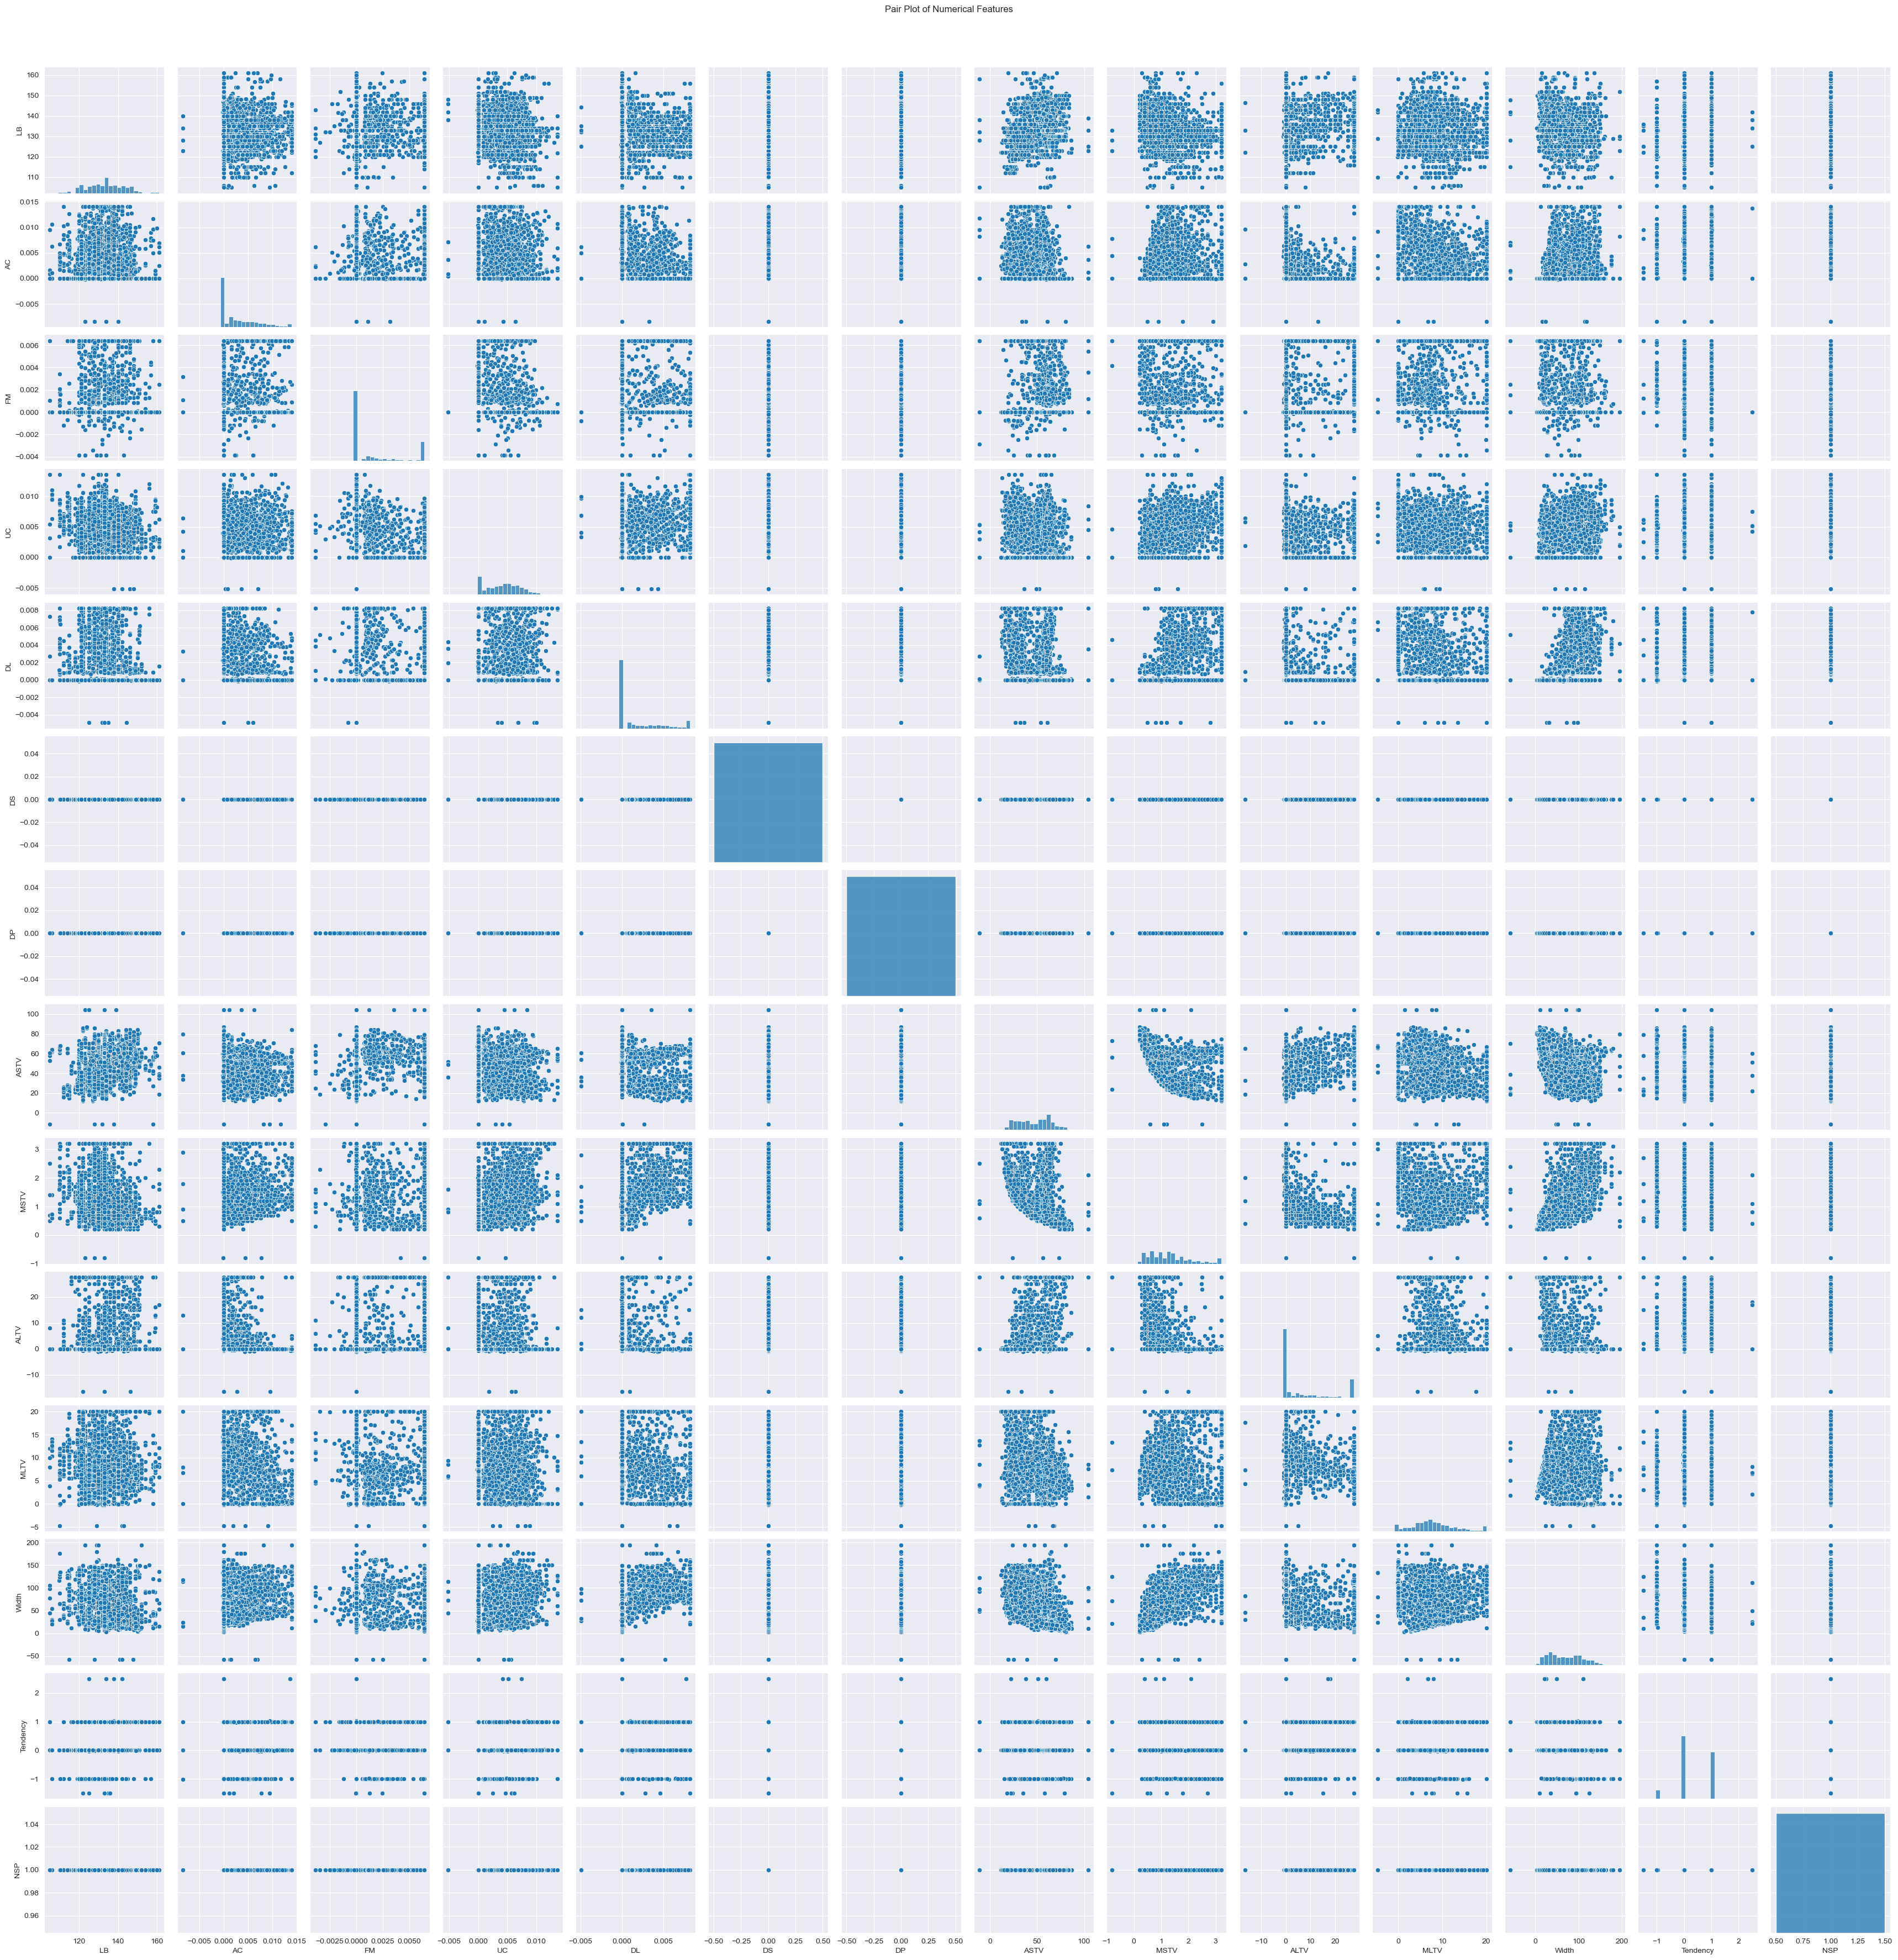

In [15]:
# 4.6 Pair plots
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

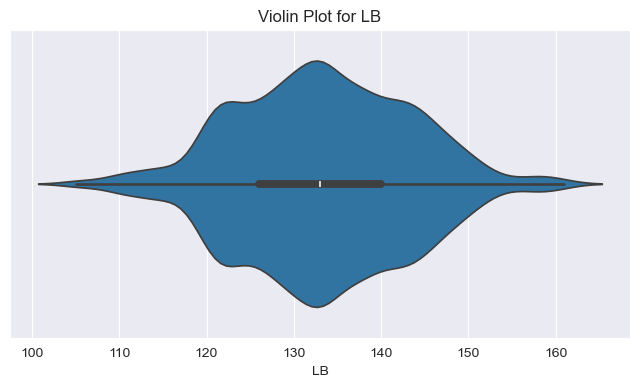

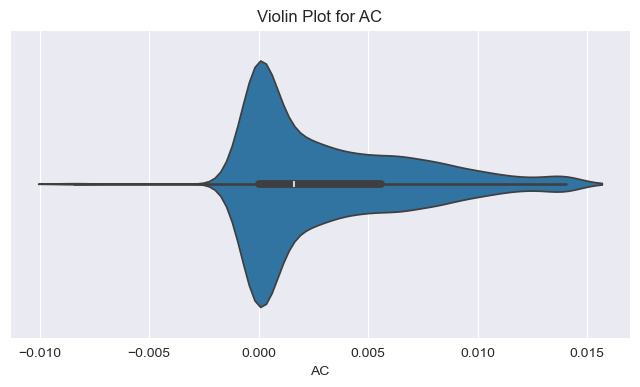

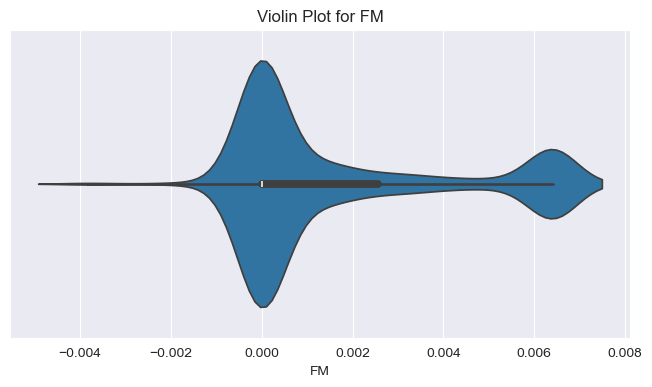

In [19]:
# 4.7 Violin plots (example: for the first three numeric columns)
for col in numeric_cols[:3]:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot for {col}')
    plt.show()

In [20]:
# 5. Pattern Recognition and Insights

# 5.1 Strong correlations
print("\nStrong Correlations (>|0.7|):")
strong_corr = corr[(corr.abs() > 0.7) & (corr.abs() < 1.0)]
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))

# 5.2 Interpret as comments below or in markdown cells in the notebook


Strong Correlations (>|0.7|):
Empty DataFrame
Columns: []
Index: []


In [21]:
# 6. Conclusion

# Add your summary and recommendations in Markdown cells or print statements
print("\nConclusion:")
print("Summarize the key findings here based on the statistics and visualizations.")


Conclusion:
Summarize the key findings here based on the statistics and visualizations.


## Key Findings and Insights from Cardiotocographic Data Analysis

### Data Quality
- The dataset was processed to handle missing values using median imputation
- Outliers were identified using the IQR method and capped to minimize their influence on the analysis
- The data preprocessing ensured a clean dataset for subsequent analysis

### Statistical Insights
- Distribution patterns across features varied, with some showing normal distribution while others exhibited skewed patterns
- The IQR analysis revealed presence of outliers in multiple variables, which could represent clinically significant cases
- Differences between mean and median values for some variables suggest non-normal distributions in those features

### Correlation Analysis
- Strong correlations (>0.7) were identified between certain features, suggesting potential redundancies or meaningful physiological relationships
- These correlations may provide opportunities for dimensionality reduction in future modeling
- Certain feature pairs demonstrated particularly strong relationships that merit further clinical investigation

### Distribution Patterns
- The histograms and violin plots revealed the underlying distributions of each feature
- Some features showed bimodal or multimodal distributions, potentially indicating distinct subgroups within the data
- The box plots highlighted the range and central tendencies of the features, emphasizing the variables with the greatest variability

### Next Steps
- Further analysis could focus on investigating the clinical significance of the strongly correlated features
- Classification modeling could leverage the patterns identified to predict fetal health outcomes
- Domain expertise should be applied to interpret the physiological meaning of the observed relationships
- Consider dimensionality reduction techniques to simplify the feature space while preserving important information

### Limitations
- This analysis focused on exploratory patterns and correlations without causal inference
- Clinical interpretation of these statistical findings requires domain expertise
- Additional external factors not captured in this dataset may influence the observed patterns